<a href="https://colab.research.google.com/github/labviros/computer-vision-topics/blob/version2020/lesson06-camera_calibration/camera_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Camera Calibration



# Complementary functions

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d
import zipfile
import time

########################################################
# Complementary functions for ploting points and vectors with Y-axis swapped with Z-axis
def set_plot(ax=None,figure = None,figsize=(9,8),limx=[-2,2],limy=[-2,2],limz=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(9,8))
    if ax==None:
        ax = plt.axes(projection='3d')

    ax.set_xlim(limx)
    ax.set_xlabel("x axis")
    ax.set_ylim(limy)
    ax.set_ylabel("y axis")
    ax.set_zlim(limz)
    ax.set_zlabel("z axis")
    return ax

#adding quivers to the plot
def draw_arrows(point,base,axis,length=1.5):
    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis


### Setting printing options
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)

#########################################################

#Read images and detect features


Number of images read:  43


<Figure size 1000x1000 with 0 Axes>

Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Image size:  480   640
Number of i

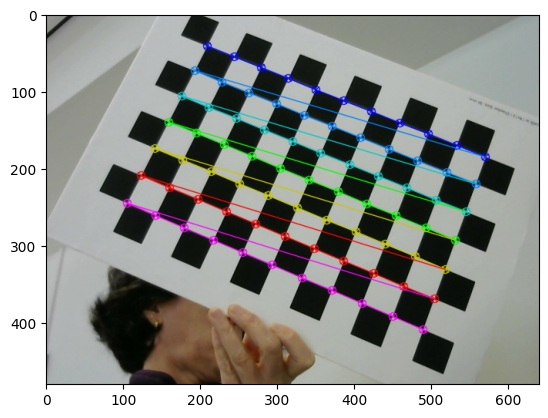

In [9]:

# Flag to read from zip file
ZipFile = False
ZipFileName = 'images.zip'

# Image path
img_path = './images/'

if ZipFile:
    # Read zip file and unzip images
    zip_ref = zipfile.ZipFile(ZipFileName,'r')
    zip_ref.extractall('./')
    zip_ref.close()

# Flag to show or not the detections
SHOW_MATPLOTLIB = True
SHOW_CV = False

# Termination criteria for corner refinement
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Chessboard parameters
square_size = 30
# l - lines, c - columns
l=7
c=11

# Prepare 3D object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((l*c,3), np.float32)
objp[:,:2] = np.mgrid[0:c*square_size:square_size,0:l*square_size:square_size].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in the world frame
imgpoints = [] # 2d points in image plane.

# Read images for calibration
images = glob.glob(img_path+'*.jpg')
# Print the number of images to see if all of them were read
print('Number of images read: ', len(images))

# Read images, detect the corners, refine to subpixel precision and plot the detected corners
if SHOW_MATPLOTLIB:
    fig = plt.figure(figsize=(10,10))
    plt.ion()
    plt.show()

for fname in images:
    # Read image
    img = cv2.imread(fname)
    # Verify if the image has landscape format. If not, rotate image
    imsize = img.shape
    print('Image size: ', imsize[0], ' ',imsize[1])
    if (imsize[1] < imsize[0]):
            img = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)

    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Convert to RGB to show with matplotlib.pyplot
    if SHOW_MATPLOTLIB:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (c,l),cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FILTER_QUADS)

    # If the corners were found, add store object points and image points (after refining them)
    if ret == True:

        # Store object points
        objpoints.append(objp)

        # Refine coordinates to subpixel values
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Store the corresponding image points
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (c,l), corners2,ret)

        # When using Colab, we can not use cv2.imshow. So we are showing images
        # with matplotlib.pyplot

        if SHOW_MATPLOTLIB:
            plt.imshow(img)
            fig.canvas.draw()
            # This will run the GUI event
            # loop until all UI events
            # currently waiting have been processed
            fig.canvas.flush_events()
            time.sleep(0.01)
        if SHOW_CV:
            cv2.imshow('img',img)
            cv2.waitKey(100)


if SHOW_CV:
    cv2.destroyAllWindows()

if SHOW_MATPLOTLIB:
    plt.ioff()

# Print the number of images where the corners could be detected
print('Number of images where the corners were detected', len(objpoints))


# Run Camera Calibration
##Print Intrinsic Matrix
##Print radial distortion coeficients

In [10]:
# Run camera calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

# Print calibration results
print('Intrinsic matrix: \n', mtx)
print('Radial distortion coeficients', dist)

# Organize the extrinsic parameters (rotation and translation) in 3xN arrays, where N is
# the number of images
transl = np.hstack(tvecs)
rot = np.hstack(rvecs)

print(transl.shape)
print(rot.shape)

Intrinsic matrix: 
 [[818.524   0.    314.753]
 [  0.    819.043 238.264]
 [  0.      0.      1.   ]]
Radial distortion coeficients [[-0.031  0.208 -0.001 -0.    -0.03 ]]
(3, 41)
(3, 41)


## Undistort one image as example
## Calculate reprojection error

Image size:  480   640


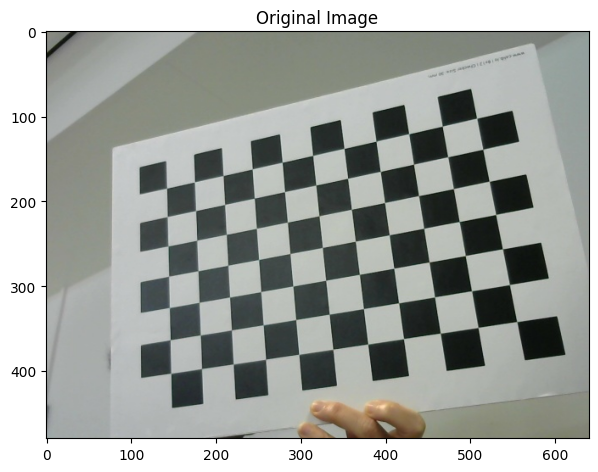

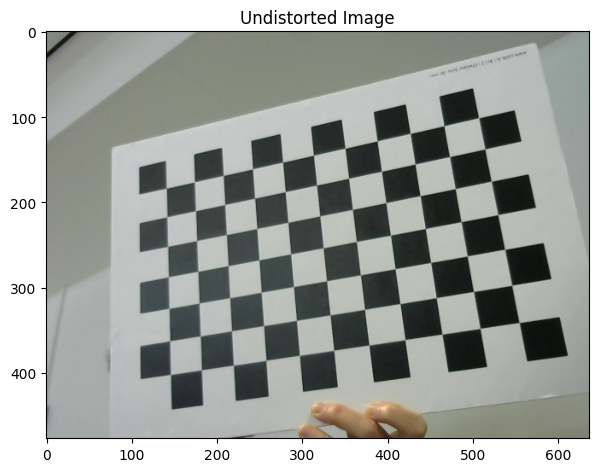

Total reprojection error:  0.016723467534313485


In [12]:
img_file = img_path+'data_24.jpg'
img = cv2.imread(img_file)
# Convert to RGB to show with matplotlib.pyplot
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
h,  w = img.shape[:2]
print('Image size: ',h,' ',w)


# Undistort one image as example
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

# When using Colab, we can not use cv2.imshow. So we are showing images
# with matplotlib.pyplot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Original Image")
plt.imshow(img)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Undistorted Image")
plt.imshow(dst)
plt.show()
#cv2.imshow('undistorted image',dst)
#cv2.waitKey(10)

# Calculate the reprojection error
mean_error = 0

for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error

print ("Total reprojection error: ", mean_error/len(objpoints))

# Uncomment if you are showing images using cv2.imshow
#cv2.destroyAllWindows()



# Show Extrinsic Parameters
## Considering the calibration pattern fixed at the origin and moving the camera.

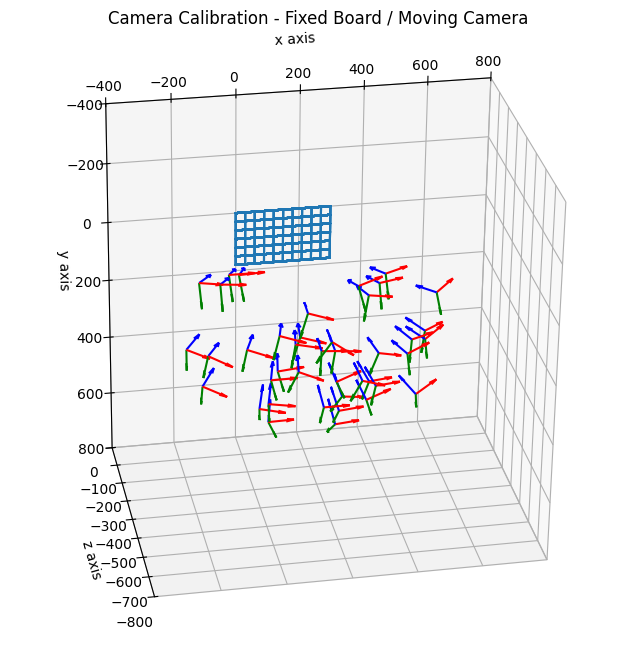

In [13]:

# Initialize figure
axis0 = set_plot(limx=[-400,800],limy=[-400,800],limz=[-800,0])
axis0.set_title('Camera Calibration - Fixed Board / Moving Camera')
# Create base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))
#origin point
origin =np.array([[0],[0],[0],[1]])
# Create camera frame and world frame
cam  = np.hstack([base,origin])
world  = np.hstack([base,origin])



# Plot camera frames considering that the calibration patern is on the XY-plane and Z=0
for i in range(rot.shape[1]):  #

    R,_ = cv2.Rodrigues(rot[:,i])
    t = transl[:,i]
    Rt = np.eye(4)
    Rt[0:3,0:3] = R
    Rt[0:3,-1] = t
    # To get the camera's rotation and translation we have to invert the
    # Extrinsic Parameters
    M = np.linalg.inv(Rt)
    # Transform the camera frame from the origin to the positon defined from
    # the extrinsic parameters
    new_cam = M@cam
    axis0 = draw_arrows(new_cam[:,-1],new_cam[:,0:3],axis0,80)

# Plot the calibration pattern as it was fixed and all the
# relative positions of the camera
X,Y = np.meshgrid(objp[:,0],objp[:,1])
#axis0 = draw_arrows(world[:,-1],world[:,0:3],world,80)
Z = np.zeros(X.shape)


axis0.plot_wireframe(X,Y,Z)
axis0.view_init(elev=-60,azim=-111,roll=23)
plt.show()



##Considering the camera fixed at the origin and moving the calibration pattern

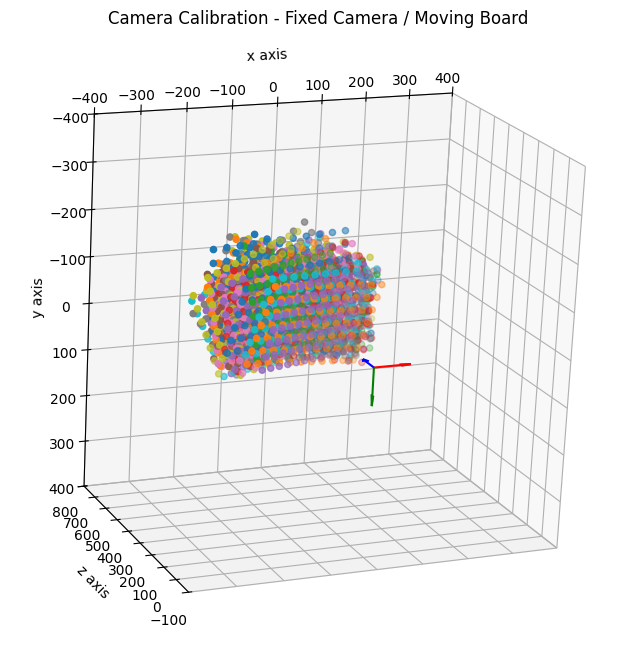

In [14]:
# Initialize figure
axis1 = set_plot(limx=[-400,400],limy=[-400,400],limz=[-100,800])
axis1.set_title('Camera Calibration - Fixed Camera / Moving Board')
# Create base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))
#origin point
origin =np.array([[0],[0],[0],[1]])
# Create camera frame and world frame
cam  = np.hstack([base,origin])
world  = np.hstack([base,origin])
axis1 = draw_arrows(cam[:,-1],cam[:,0:3],axis1,80)


calib_points = objp.T
#add a vector of ones to the chessboard points to represent them in homogeneous coordinates
calib_points = np.vstack([calib_points, np.ones(np.size(calib_points,1))])



# Plot calibration patter considering the camera fixed at (0,0,0)
for i in range(rot.shape[1]):

    # Set up the transformation matrix
    R,_ = cv2.Rodrigues(rot[:,i])
    t = transl[:,i]
    Rt = np.eye(4)
    Rt[0:3,0:3] = R
    Rt[0:3,-1] = t

    chessboard = Rt@calib_points
    new_world = Rt@world
    axis1.scatter(chessboard[0,:],chessboard[1,:],chessboard[2,:])
    #axis1 = draw_arrows(new_world[:,-1],new_world[:,0:3],axis1,80)


axis1.view_init(elev=-60,azim=-142,roll=53)

plt.show()

